In [1]:
# I N T R O D U C T I O N

# This notebook covers the EDA of inside Airbnb´s data on Stockholm.
# The two teammates also analyze two other European metropoles: Rome and Barcelona.

# Airbnb is a plattform developed out of the couchsurfing movement and is open for commercial use.
# Unfortunately, cities with a very tense housing market experienced a kind of misuse of airbnb:
# Many properties have been bought specifically as short-term-rental investments, managed by agencies that have dozens of such properties.
# The agencies act as broker and charge a commission from each booking. 
# This is critical because
# - The mass subletting of housing at high prices for short stays is putting further pressure on the already tight housing market. 
# - Housing is becoming scarcer, rents are rising.
# - Fewer taxes are being collected through tourism.
# - Municipalities are losing control over the amount of tourism.
# - Residents are annoyed by the many strangers coming in and out of their homes.

# Airbnb does not assume any legal obligations so that some cities issued regulations.

# Nevertheless, some infringements are visible and they are some kind of predictable if there are applicable laws as it is the case in Barcelona.

# Stockholm did not release any regulations yet so that there are no infringements.
# Therefore, this notebook provides

# 1. an EDA, if there are some KPIs that may suggest a danger of missuse in an unregulated environment with no extremely tense housing market
# 2. a short EDA in regards of pricing in Stockholm
# 3. perhaps a model for price prediction based on Stockholm data

# Data used in this project is taken from Inside Airbnb.

In [2]:
# EDA 1
# Hypotheses: when are commercial hosts unhealthy for a public community?

# Hosts with more than (?) properties.
# Hosts with an occupancy rate significantly higher than 30%.
# Hosts on more than two community which means that they manage more than their condo and one vacational place.
# Hosts with less or equal to 3 nights minimum stay.
# Hosts with an amount of reviews far over mean.
# Hosts with an acceptance rate = 100%

# let´s try if it is possible to filter the data after the EDA if the hypotheses remain ok.

# In general, a certain desity of airbnb per area or inhabitants/area may indicate missuse.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
c = ['#8e9aaf', '#cbc0d3', '#efd3d7', '#dee2ff', '#feeafa']
plt.style.use('default')

In [4]:
# getting a feeling for Stockholm's data

In [33]:
sh = pd.read_csv("../data/listings 2.csv")
sh.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20221229235426,2022-12-30,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,...,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,164448,https://www.airbnb.com/rooms/164448,20221229235426,2022-12-30,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/1101571/13429...,784312,...,4.97,4.83,4.76,NaN,t,2,0,2,0,2.55
2,170651,https://www.airbnb.com/rooms/170651,20221229235426,2022-12-30,city scrape,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,NaN,https://a0.muscache.com/pictures/74dc2c29-1f7a...,814021,...,4.92,4.84,4.74,NaN,f,1,1,0,0,0.30
3,206221,https://www.airbnb.com/rooms/206221,20221229235426,2022-12-30,city scrape,Doubleroom at Södermalm &trendySofo,<b>The space</b><br />The region is situated a...,NaN,https://a0.muscache.com/pictures/1792713/2c120...,1022374,...,4.90,4.94,4.83,NaN,f,1,0,0,1,0.59
4,208366,https://www.airbnb.com/rooms/208366,20221229235426,2022-12-30,city scrape,Central apt. in Sofo .Perfect 4 Families & Kids,<b>The space</b><br />LOCATION:<br />Beautiful...,NaN,https://a0.muscache.com/pictures/5648534/0238f...,993889,...,4.92,4.70,4.49,NaN,f,1,1,0,0,0.32


In [6]:
sh_nb = pd.read_csv("../data/neighbourhoods.csv")
sh_nb.head()

,neighbourhood_group,neighbourhood
0,NaN,Älvsjö
1,NaN,Bromma
2,NaN,Enskede-Årsta-Vantörs
3,NaN,Farsta
4,NaN,Hägersten-Liljeholmens


In [7]:
sh_rev = pd.read_csv("../data/reviews.csv")
sh_rev.head()

,listing_id,date
0,75590,2013-08-02
1,75590,2013-08-09
2,75590,2013-08-16
3,75590,2013-08-19
4,75590,2013-08-28


In [8]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3339 non-null   int64  
 1   listing_url                                   3339 non-null   object 
 2   scrape_id                                     3339 non-null   int64  
 3   last_scraped                                  3339 non-null   object 
 4   source                                        3339 non-null   object 
 5   name                                          3337 non-null   object 
 6   description                                   3234 non-null   object 
 7   neighborhood_overview                         1561 non-null   object 
 8   picture_url                                   3339 non-null   object 
 9   host_id                                       3339 non-null   i

In [9]:
sh1 = sh

In [10]:
sh.shape

(3339, 75)

In [11]:
sh.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.339000e+03,3.339000e+03,3.339000e+03,3339.000000,3339.000000,0.0,3339.000000,3339.000000,3339.000000,0.0,...,2733.000000,2733.000000,2733.000000,2733.000000,0.0,3339.000000,3339.000000,3339.000000,3339.000000,2751.000000
mean,2.042764e+17,2.022123e+13,1.310851e+08,12.949686,33.369572,NaN,59.319302,18.032603,3.279724,NaN,...,4.859104,4.857720,4.793882,4.711965,NaN,4.079365,3.471998,0.431267,0.037436,1.097866
std,3.130319e+17,0.000000e+00,1.445568e+08,107.899485,326.654131,NaN,0.029821,0.063394,1.968349,NaN,...,0.324864,0.323789,0.322909,0.360283,NaN,10.204294,10.122114,1.119437,0.360713,1.428936
min,7.559000e+04,2.022123e+13,4.457000e+03,1.000000,1.000000,NaN,59.231950,17.773110,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.180487e+07,2.022123e+13,1.942711e+07,1.000000,1.000000,NaN,59.300990,18.004925,2.000000,NaN,...,4.830000,4.850000,4.710000,4.610000,NaN,1.000000,1.000000,0.000000,0.000000,0.200000
50%,4.205427e+07,2.022123e+13,6.288472e+07,1.000000,2.000000,NaN,59.318020,18.049960,3.000000,NaN,...,4.960000,4.980000,4.890000,4.790000,NaN,1.000000,1.000000,0.000000,0.000000,0.510000
75%,6.080883e+17,2.022123e+13,2.100933e+08,2.000000,4.000000,NaN,59.337804,18.076085,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,2.000000,1.000000,0.000000,0.000000,1.350000
max,7.921731e+17,2.022123e+13,4.929636e+08,1597.000000,5139.000000,NaN,59.418580,18.166070,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,65.000000,65.000000,8.000000,5.000000,17.090000


In [12]:
sh.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [13]:
# many columns without interest: easy cleaning

sh = sh[['id', 'name',
       'description', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate',
       'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'host_identity_verified', 
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

<Axes: >

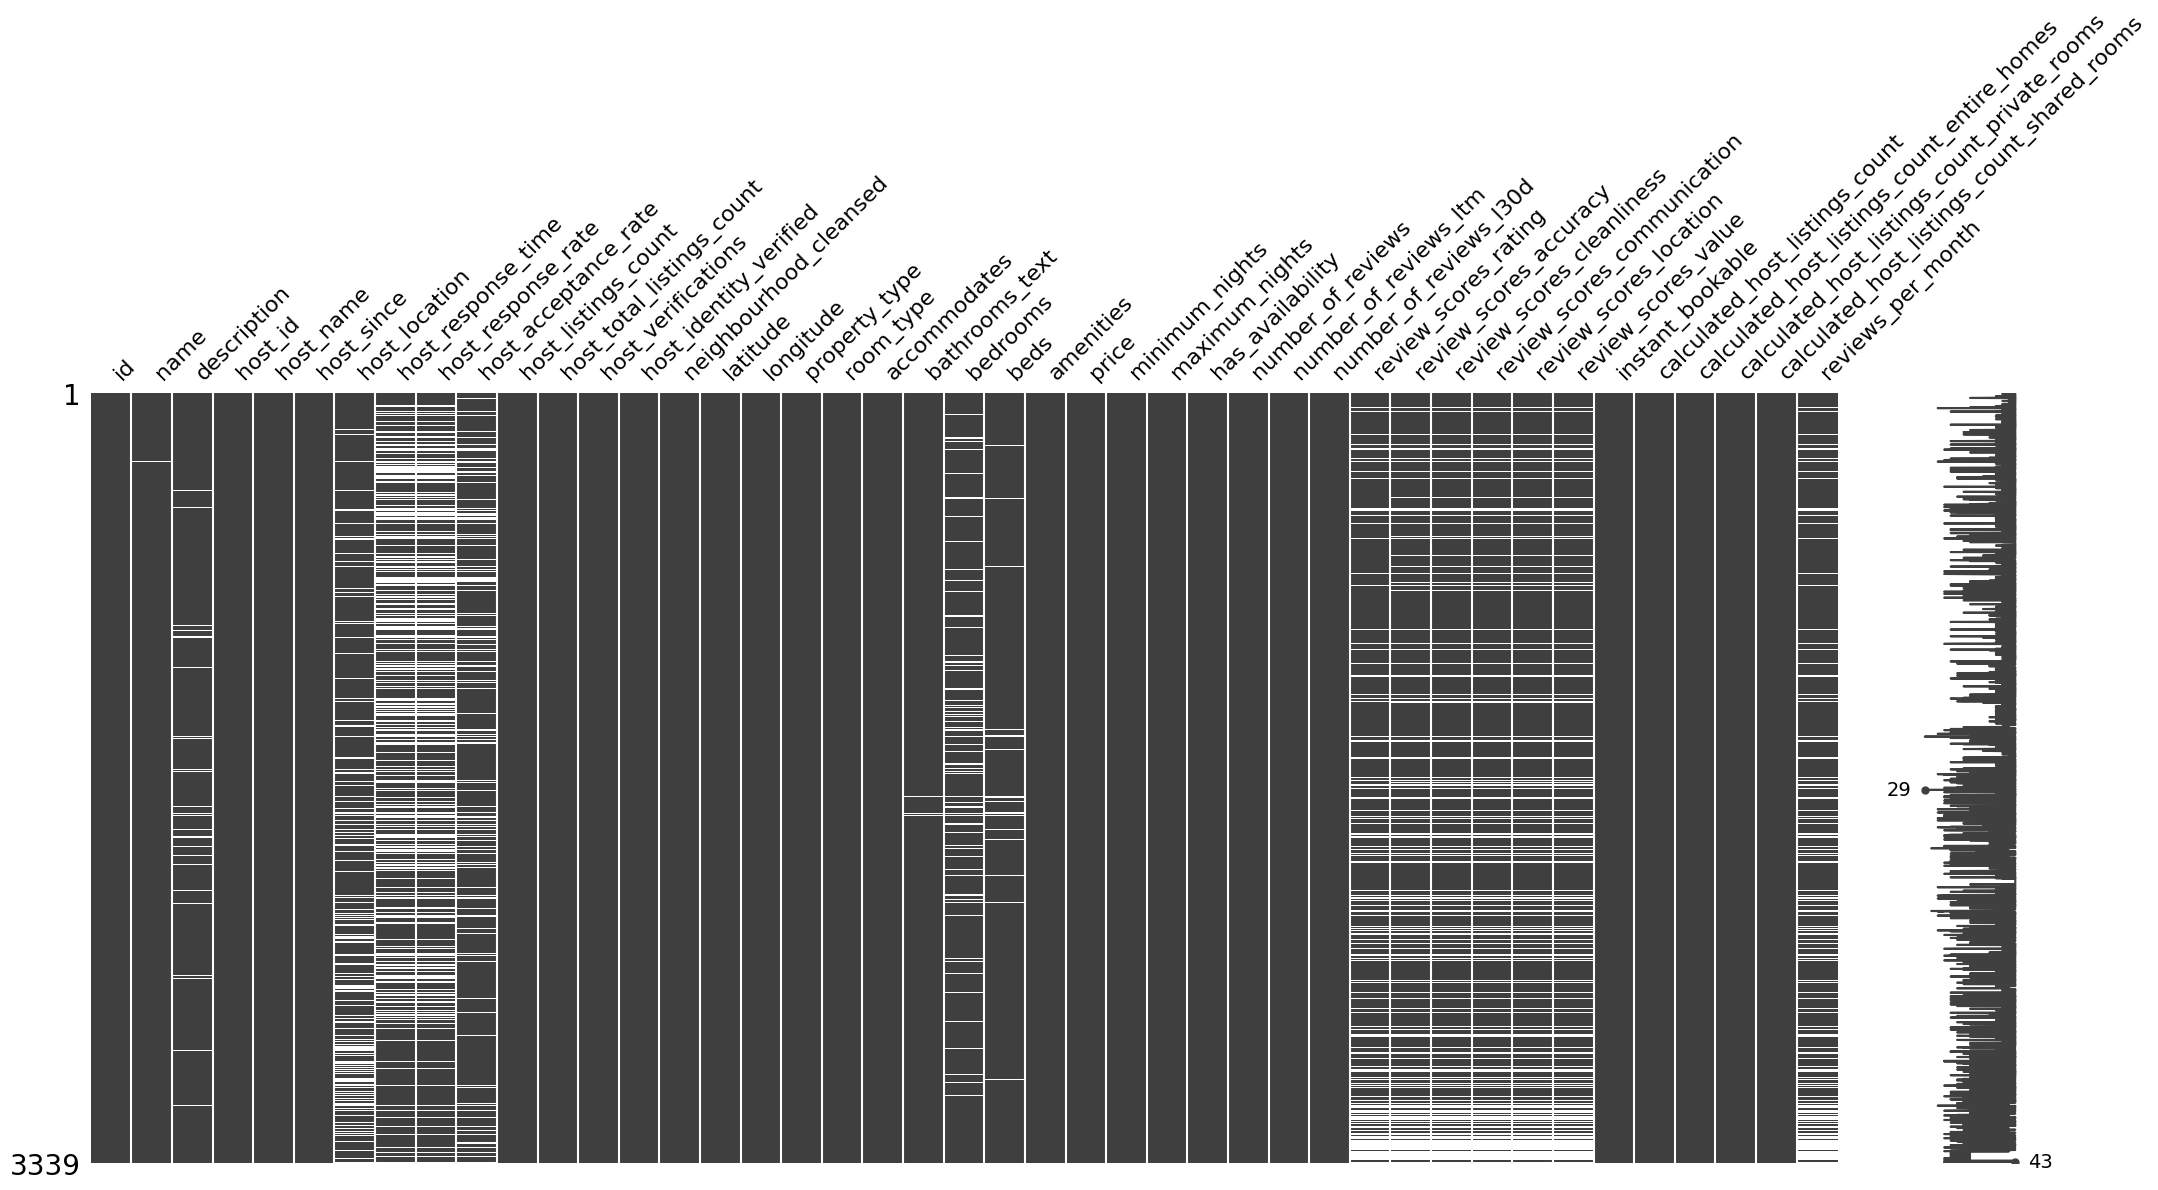

In [14]:
!pip install missingno
import missingno as msno
msno.matrix(sh)

In [15]:
sh.head()

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...",397766,Peter,2011-02-18,"Stockholm, Sweden",NaN,NaN,0%,...,4.89,5.00,4.78,4.78,f,1,1,0,0,0.09
1,164448,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,784312,Li,2011-07-06,"Stockholm, Sweden",within an hour,100%,100%,...,4.81,4.97,4.83,4.76,t,2,0,2,0,2.55
2,170651,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,814021,Marie,2011-07-13,"Stockholm, Sweden",within a few hours,100%,29%,...,4.55,4.92,4.84,4.74,f,1,1,0,0,0.30
3,206221,Doubleroom at Södermalm &trendySofo,<b>The space</b><br />The region is situated a...,1022374,Elisabeth,2011-08-26,Sweden,a few days or more,0%,0%,...,4.83,4.90,4.94,4.83,f,1,0,0,1,0.59
4,208366,Central apt. in Sofo .Perfect 4 Families & Kids,<b>The space</b><br />LOCATION:<br />Beautiful...,993889,Bartholomew Lion,2011-08-19,"Stockholm, Sweden",within an hour,100%,17%,...,4.43,4.92,4.70,4.49,f,1,1,0,0,0.32


In [16]:
sh.isna().sum()
# in a second step, remove columns with no entries = neighbourhood_group_cleansed, bathrooms (!!), and license. 
# Are they all private?
# in a third step, remove columns with more than around 50% missing values 
# like neighborhood_overview, host_about, neighbourhood
# rows removal: later

id                                                 0
name                                               2
description                                      105
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                    592
host_response_time                              1085
host_response_rate                              1085
host_acceptance_rate                             527
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                     

In [17]:
# explore Stockholm's airbnb data in general

# distribution of skewness in hosts
# centrality / spread of hosts, prices, room types
# instant bookable / main hosts
# most popular room type
# avg price / room type, neighborhood?
# add column: ratio offers/host
# add column: occupancy rate (days/year/no of frequence of bookings)

# unexpected values?
# missing values?

# ratio hosts/inhabitants of citiy (950.000)

In [34]:
sh1["license"].unique()

array([nan])

In [19]:
# lookup
sh[['id', 'host_id', 'name']].loc[sh['host_id'] == 492963558]

,id,host_id,name
3333,791041859220768353,492963558,Cozy apartment in Stockholm


In [20]:
#1: host listings
sh.host_listings_count

0       1
1       2
2       1
3       1
4       1
       ..
3334    2
3335    1
3336    1
3337    1
3338    5
Name: host_listings_count, Length: 3339, dtype: int64

In [21]:
sh.host_total_listings_count

0       2
1       2
2       1
3       2
4       1
       ..
3334    2
3335    1
3336    1
3337    1
3338    5
Name: host_total_listings_count, Length: 3339, dtype: int64

In [35]:
sh['listings_diff'] = sh.apply(lambda row: row.host_total_listings_count - row.host_listings_count, axis=1)
sh.listings_diff.value_counts(bins = 3)

listings_diff
(-3.5429999999999997, 1180.667]    3326
(2361.333, 3542.0]                   13
(1180.667, 2361.333]                  0
Name: count, dtype: int64

In [23]:
sh.listings_diff.unique()

array([   1,    0,    2,    4,    3,   21,    7,    5,    6,   28,   10,
        103,  115,   89,   15,   97,   71,   11,   19,  112,   13,   25,
       3542,   16,  807,    8,   14])

In [24]:
sh.listings_diff.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3339 entries, 0 to 3338
Series name: listings_diff
Non-Null Count  Dtype
--------------  -----
3339 non-null   int64
dtypes: int64(1)
memory usage: 26.2 KB


In [25]:
sh[sh.listings_diff >= 2].shape

(733, 44)

In [26]:
sh.host_listings_count.value_counts(sort=True, bins = 10)

host_listings_count
(-0.597, 160.6]     3318
(1437.4, 1597.0]      13
(320.2, 479.8]         5
(1277.8, 1437.4]       3
(160.6, 320.2]         0
(479.8, 639.4]         0
(639.4, 799.0]         0
(799.0, 958.6]         0
(958.6, 1118.2]        0
(1118.2, 1277.8]       0
Name: count, dtype: int64

In [27]:
sh[sh.host_listings_count >= 3].shape

(721, 44)

In [28]:
#2: share room type

<Axes: xlabel='room_type', ylabel='count'>

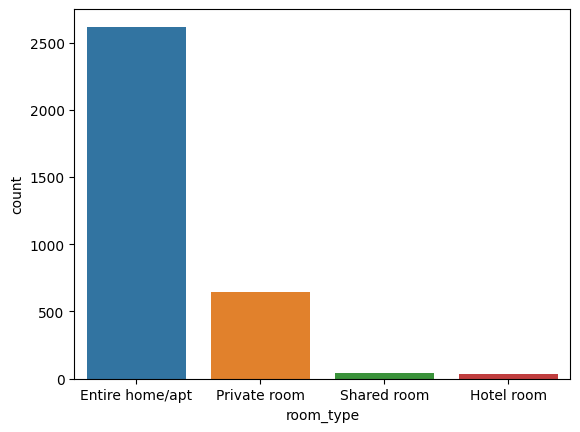

In [29]:
sns.countplot(x="room_type", data = sh)

In [30]:
sh.room_type.value_counts()

room_type
Entire home/apt    2618
Private room        646
Shared room          40
Hotel room           35
Name: count, dtype: int64

In [37]:
sh.price.head(10)

0      $949.00
1      $864.00
2    $1,055.00
3      $669.00
4      $829.00
5      $450.00
6    $1,255.00
7      $814.00
8    $2,616.00
9    $1,056.00
Name: price, dtype: object

In [38]:
sh.price.value_counts()

price
$1,000.00    105
$1,200.00     93
$1,500.00     81
$700.00       81
$800.00       76
            ... 
$1,097.00      1
$1,731.00      1
$2,673.00      1
$907.00        1
$602.00        1
Name: count, Length: 1047, dtype: int64

In [39]:
sh.price.describe()

count          3339
unique         1047
top       $1,000.00
freq            105
Name: price, dtype: object

In [41]:
expensive = sh.sort_values('price').tail(35)
print(expensive.price)

1094    $990.00
2588    $990.00
2894    $990.00
504     $990.00
211     $990.00
3113    $990.00
3108    $990.00
1596    $990.00
3092    $990.00
391     $990.00
450     $990.00
1737    $990.00
2182    $990.00
111     $990.00
2707    $991.00
2040    $991.00
2039    $991.00
2042    $991.00
2230    $991.00
1385    $993.00
2249    $994.00
238     $995.00
623     $995.00
1124    $995.00
2534    $995.00
2022    $997.00
1431    $999.00
619     $999.00
499     $999.00
3234    $999.00
2309    $999.00
125     $999.00
3205    $999.00
581     $999.00
81      $999.00
Name: price, dtype: object


In [42]:
sh.property_type.unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Entire condo', 'Shared room in rental unit',
       'Private room in home', 'Private room in loft', 'Entire townhouse',
       'Private room in townhouse', 'Entire home', 'Entire villa',
       'Entire loft', 'Private room in condo', 'Entire guesthouse',
       'Private room in villa', 'Private room in bed and breakfast',
       'Private room in guesthouse', 'Entire cabin',
       'Entire serviced apartment', 'Entire guest suite',
       'Shared room in hostel', 'Private room in guest suite',
       'Room in hotel', 'Shared room in home', 'Farm stay',
       'Room in boutique hotel', 'Entire cottage',
       'Room in serviced apartment', 'Tiny home',
       'Private room in hostel', 'Shared room in cabin', 'Boat',
       'Private room in boat', 'Entire in-law', 'Entire vacation home',
       'Room in hostel', 'Shared room in condo', 'Room in aparthotel',
       'Shared room in bed and breakfast', 'Casa particular',
   

In [43]:
wanted = ['Private room in bed and breakfast', 'Entire serviced apartment', 'Shared room in hostel', 'Room in hotel', 'Room in boutique hotel', 'Room in serviced apartment', 'Private room in hostel', 'Room in hostel', 'Room in aparthotel', 'Shared room in bed and breakfast', 'Shared room in bed and breakfast']
sh_wanted = sh[sh["property_type"].isin(wanted)]
sh_wanted.shape

(168, 76)

In [44]:
sh_wanted[sh_wanted.listings_diff >= 2].shape

(40, 76)

In [45]:
sh.bedrooms.unique()

array([ 2.,  1.,  3.,  4., nan,  6.,  5., 12.])

In [46]:
sh.beds.unique()

array([ 1.,  2.,  4.,  3.,  6.,  5., nan, 10.,  8.,  7.,  9., 11., 20.,
       14., 12., 22., 15.])

In [47]:
minu = sh.minimum_nights.unique()
print(sorted(minu))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 21, 22, 25, 27, 28, 29, 30, 31, 34, 40, 48, 50, 56, 60, 70, 72, 89, 90, 92, 100, 110, 120, 129, 150, 180, 200, 205, 240, 270, 300, 301, 365, 500]


In [48]:
sh[sh.minimum_nights >= 4].shape

(1261, 76)

In [49]:
sh_nc = sh.neighbourhood_cleansed.unique()
print(sorted(sh_nc))

['Bromma', 'Enskede-Årsta-Vantörs', 'Farsta', 'Hägersten-Liljeholmens', 'Hässelby-Vällingby', 'Kungsholmens', 'Norrmalms', 'Rinkeby-Tensta', 'Skarpnäcks', 'Skärholmens', 'Spånga-Tensta', 'Södermalms', 'Älvsjö', 'Östermalms']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Skarpnäcks'),
  Text(1, 0, 'Södermalms'),
  Text(2, 0, 'Kungsholmens'),
  Text(3, 0, 'Norrmalms'),
  Text(4, 0, 'Älvsjö'),
  Text(5, 0, 'Farsta'),
  Text(6, 0, 'Enskede-Årsta-Vantörs'),
  Text(7, 0, 'Hägersten-Liljeholmens'),
  Text(8, 0, 'Östermalms'),
  Text(9, 0, 'Bromma'),
  Text(10, 0, 'Skärholmens'),
  Text(11, 0, 'Hässelby-Vällingby'),
  Text(12, 0, 'Spånga-Tensta'),
  Text(13, 0, 'Rinkeby-Tensta')])

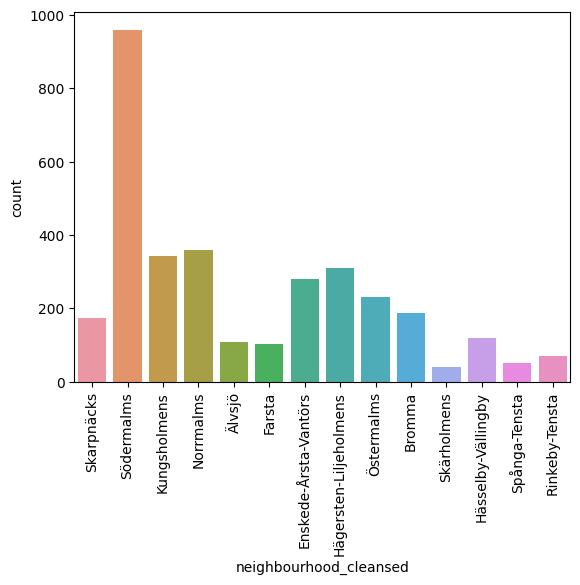

In [50]:
sns.countplot(x='neighbourhood_cleansed', data = sh)
plt.xticks(rotation = 90)

In [51]:
sh["has_availability"].value_counts()

has_availability
t    3275
f      64
Name: count, dtype: int64

In [52]:
sh1["availability_30"].describe()

count    3339.000000
mean        9.774483
std        11.447973
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max        30.000000
Name: availability_30, dtype: float64

In [53]:
sh1.availability_30.value_counts(ascending = True, bins = 6)

availability_30
(15.0, 20.0]      186
(10.0, 15.0]      200
(20.0, 25.0]      266
(5.0, 10.0]       294
(25.0, 30.0]      608
(-0.031, 5.0]    1785
Name: count, dtype: int64

In [54]:
sh1["availability_60"].describe()

count    3339.000000
mean       21.436358
std        23.462508
min         0.000000
25%         0.000000
50%        10.000000
75%        46.000000
max        60.000000
Name: availability_60, dtype: float64

In [55]:
sh1.availability_60.value_counts(ascending = True, bins = 6)

availability_60
(30.0, 40.0]       200
(40.0, 50.0]       200
(10.0, 20.0]       223
(20.0, 30.0]       289
(50.0, 60.0]       743
(-0.061, 10.0]    1684
Name: count, dtype: int64

In [56]:
sh1["availability_90"].describe()

count    3339.000000
mean       34.557652
std        35.916460
min         0.000000
25%         0.000000
50%        19.000000
75%        74.000000
max        90.000000
Name: availability_90, dtype: float64

In [57]:
sh1.availability_90.value_counts(ascending = True, bins = 6)

availability_90
(30.0, 45.0]       199
(60.0, 75.0]       224
(15.0, 30.0]       227
(45.0, 60.0]       278
(75.0, 90.0]       802
(-0.091, 15.0]    1609
Name: count, dtype: int64

In [58]:
sh1["availability_365"].describe()

count    3339.000000
mean      135.754118
std       138.868128
min         0.000000
25%         0.000000
50%        83.000000
75%       272.000000
max       365.000000
Name: availability_365, dtype: float64

In [59]:
sh1.availability_365.value_counts(ascending = True, bins = 6)

availability_365
(182.5, 243.333]       197
(243.333, 304.167]     221
(121.667, 182.5]       309
(60.833, 121.667]      382
(304.167, 365.0]       719
(-0.366, 60.833]      1511
Name: count, dtype: int64

In [60]:
a30 = [1785, 294, 200, 186, 266, 608]
a60 = [1684, 223, 289, 200, 200, 743]
a90 = [1609, 227, 199, 278, 224, 802]
a365 = [1511, 382, 309, 197, 221, 719]

df = pd.DataFrame(data=[a30, a60, a90, a365])
df.columns = ["bin1", "bin2", "bin3", "bin4", "bin5", "bin6"]
print(df)

   bin1  bin2  bin3  bin4  bin5  bin6
0  1785   294   200   186   266   608
1  1684   223   289   200   200   743
2  1609   227   199   278   224   802
3  1511   382   309   197   221   719


<Axes: >

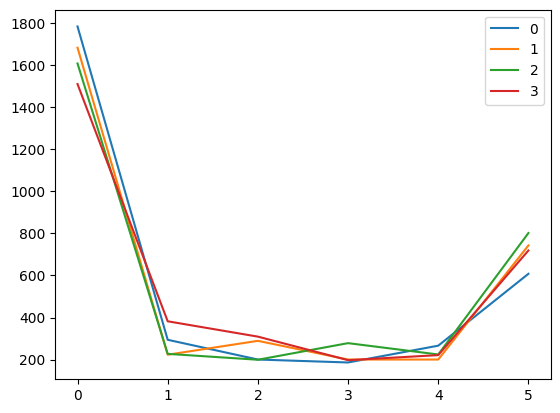

In [61]:
pd.DataFrame(df.values.T).plot()

In [62]:
sh["instant_bookable"].value_counts()

instant_bookable
f    2682
t     657
Name: count, dtype: int64

In [65]:
sh.number_of_reviews.sum()

91446

In [66]:
sh.number_of_reviews_ltm.sum()

29491

In [67]:
sh.number_of_reviews_l30d.sum()

1730

In [68]:
sh.review_scores_rating.describe()

count    2751.000000
mean        4.752792
std         0.525217
min         0.000000
25%         4.710000
50%         4.890000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

In [69]:
sh.review_scores_accuracy.describe()

count    2733.000000
mean        4.805960
std         0.341047
min         1.000000
25%         4.750000
50%         4.910000
75%         5.000000
max         5.000000
Name: review_scores_accuracy, dtype: float64

In [70]:
sh.review_scores_cleanliness.describe()

count    2733.00000
mean        4.73311
std         0.40777
min         1.00000
25%         4.67000
50%         4.86000
75%         5.00000
max         5.00000
Name: review_scores_cleanliness, dtype: float64

In [71]:
sh.review_scores_communication.describe()

count    2733.000000
mean        4.857720
std         0.323789
min         1.000000
25%         4.850000
50%         4.980000
75%         5.000000
max         5.000000
Name: review_scores_communication, dtype: float64

In [72]:
sh.review_scores_location.describe()

count    2733.000000
mean        4.793882
std         0.322909
min         1.000000
25%         4.710000
50%         4.890000
75%         5.000000
max         5.000000
Name: review_scores_location, dtype: float64

In [73]:
sh.review_scores_value.describe()

count    2733.000000
mean        4.711965
std         0.360283
min         1.000000
25%         4.610000
50%         4.790000
75%         5.000000
max         5.000000
Name: review_scores_value, dtype: float64

In [ ]:
# data cleaning:
# - 2 rows without "name"
# - slicing the outliers in price

In [76]:
sh = sh[sh['name'].notna()]

In [75]:
sh.isna().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               587
listings_diff                                     0
Length: 76, dtype: int64

In [80]:
expensive = sh.sort_values('price').tail(35)

In [ ]:
# CHECK for RELATIONSHIPS

# hosts with extraordinary multiple listings
# frequence of bookings
# occupancy
# add column: occupancy rate (days/year/no of frequence of bookings?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'within an hour'),
  Text(1, 0, 'within a few hours'),
  Text(2, 0, 'within a day'),
  Text(3, 0, 'a few days or more'),
  Text(4, 0, 'no_info')])

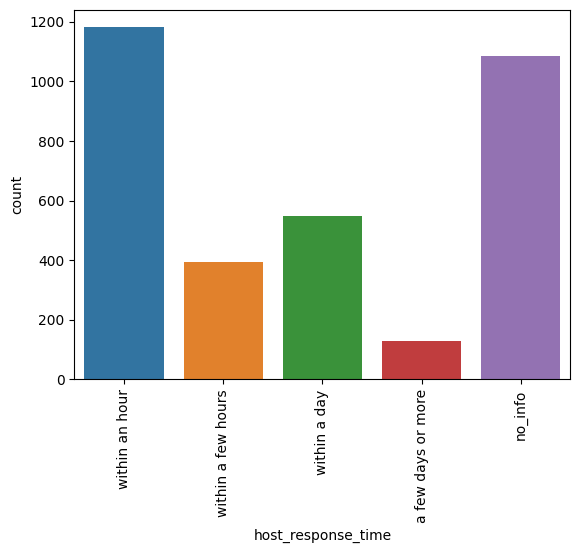

In [82]:
sh.host_response_time = sh.host_response_time.fillna("no_info")
cat_order = ["within an hour", "within a few hours", "within a day", "a few days or more", "no_info"]
sns.countplot(x="host_response_time", data = sh, order = cat_order)
plt.xticks(rotation = 90)

In [ ]:
# Listings & Einwohner je Vorort (2014)
#Södermalms                960 / 126.736
#Norrmalms                 359 / 69.592
#Kungsholmens              343 / 68.016
#Hägersten-Liljeholmens    311 / 83.283
#Enskede-Årsta-Vantörs     281 / 96.916
#Östermalms                231 / 61.000
#Bromma                    188 / 72.000
#Skarpnäcks                174 / 45.340
#Hässelby-Vällingby        120 / 71.042
#Älvsjö                    107 / 27.500
#Farsta                    103 / 55.300
#Rinkeby-Tensta             71 / 46.000
#Spånga-Tensta              50 / 38.082
#Skärholmens                41 / 31.000

In [83]:
sh1.availability_365.value_counts()

availability_365
0      884
365    122
363     74
364     46
1       45
      ... 
281      1
210      1
185      1
137      1
98       1
Name: count, Length: 357, dtype: int64

In [84]:
sh_check = sh1[["host_response_rate","host_acceptance_rate", "availability_90", "number_of_reviews_ltm", "instant_bookable", "host_response_time"]]
sh_check

,host_response_rate,host_acceptance_rate,availability_90,number_of_reviews_ltm,instant_bookable,host_response_time
0,NaN,0%,88,0,f,NaN
1,100%,100%,87,33,t,within an hour
2,100%,29%,33,3,f,within a few hours
3,0%,0%,88,0,f,a few days or more
4,100%,17%,2,0,f,within an hour
...,...,...,...,...,...,...
3334,100%,75%,40,0,f,within a few hours
3335,100%,100%,83,0,f,within an hour
3336,NaN,NaN,17,0,f,NaN
3337,NaN,NaN,30,0,f,NaN


In [85]:
sh_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   host_response_rate     2254 non-null   object
 1   host_acceptance_rate   2812 non-null   object
 2   availability_90        3339 non-null   int64 
 3   number_of_reviews_ltm  3339 non-null   int64 
 4   instant_bookable       3339 non-null   object
 5   host_response_time     2254 non-null   object
dtypes: int64(2), object(4)
memory usage: 156.6+ KB


In [86]:
sh.host_response_rate = sh.host_response_rate.str.replace('%', '')
sh.host_response_rate = sh.host_response_rate.astype(float)
sh.host_response_rate.value_counts().sort_values()

host_response_rate
61.0        1
85.0        1
56.0        1
79.0        1
64.0        1
14.0        1
13.0        1
94.0        2
17.0        2
43.0        2
22.0        3
82.0        4
89.0        4
93.0        4
78.0        5
84.0        5
40.0        5
96.0        5
63.0        5
71.0        6
95.0        6
92.0        6
91.0        6
65.0        7
20.0        8
25.0        9
33.0       10
86.0       11
70.0       17
83.0       18
99.0       19
88.0       19
60.0       22
75.0       27
98.0       34
97.0       39
50.0       41
80.0       42
67.0       43
90.0       54
0.0        84
100.0    1672
Name: count, dtype: int64

In [87]:
sh.host_response_rate.isna().sum()

1084

In [88]:
sh.host_response_rate.info()

<class 'pandas.core.series.Series'>
Index: 3337 entries, 0 to 3338
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
2253 non-null   float64
dtypes: float64(1)
memory usage: 52.1 KB


In [89]:
sh.host_response_time.value_counts()

host_response_time
within an hour        1181
no_info               1084
within a day           549
within a few hours     395
a few days or more     128
Name: count, dtype: int64

In [90]:
sh.host_response_time.isna().sum()

0

In [91]:
sh.host_acceptance_rate = sh.host_acceptance_rate.str.replace('%', '')
sh.host_acceptance_rate.value_counts().sort_index()

host_acceptance_rate
0      214
10       5
100    948
11       5
13      10
      ... 
95      26
96      68
97     126
98      95
99      83
Name: count, Length: 91, dtype: int64

In [92]:
sh.host_acceptance_rate.isna().sum()

526

In [93]:
sh.host_acceptance_rate.astype(float).describe()

count    2811.000000
mean       74.887940
std        31.955417
min         0.000000
25%        56.000000
50%        92.000000
75%       100.000000
max       100.000000
Name: host_acceptance_rate, dtype: float64

In [94]:
sh1.availability_90.value_counts().sort_index()

availability_90
0     1158
1       74
2       52
3       40
4       18
      ... 
86      30
87      83
88     145
89      88
90     174
Name: count, Length: 91, dtype: int64

In [95]:
sh = sh1.assign(availability_90_ratio=lambda x: x["availability_90"] / 90)
sh.availability_90_ratio.describe()

count    3339.000000
mean        0.383974
std         0.399072
min         0.000000
25%         0.000000
50%         0.211111
75%         0.822222
max         1.000000
Name: availability_90_ratio, dtype: float64

In [96]:
sh[sh["availability_90_ratio"] < 0.7]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_90_ratio
2,170651,https://www.airbnb.com/rooms/170651,20221229235426,2022-12-30,city scrape,Petit Charm Rooftop next to heaven,My place is perfect for 1 person or mabey 2 if...,NaN,https://a0.muscache.com/pictures/74dc2c29-1f7a...,814021,...,4.84,4.74,NaN,f,1,1,0,0,0.30,0.366667
4,208366,https://www.airbnb.com/rooms/208366,20221229235426,2022-12-30,city scrape,Central apt. in Sofo .Perfect 4 Families & Kids,<b>The space</b><br />LOCATION:<br />Beautiful...,NaN,https://a0.muscache.com/pictures/5648534/0238f...,993889,...,4.70,4.49,NaN,f,1,1,0,0,0.32,0.022222
5,220851,https://www.airbnb.com/rooms/220851,20221229235426,2022-12-30,city scrape,One room in appartement,Welcome!<br /><br /><b>The space</b><br />Welc...,Many restaurangs wery close and walkingdistanc...,https://a0.muscache.com/pictures/2085606/7a706...,412283,...,4.83,4.71,NaN,f,1,0,1,0,0.43,0.000000
6,238411,https://www.airbnb.com/rooms/238411,20221229235426,2022-12-30,city scrape,Cozy apartment in central Stockholm,"<b>The space</b><br />This is a cozy, fully eq...","Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,...,4.85,4.63,NaN,f,1,1,0,0,0.82,0.633333
9,299154,https://www.airbnb.com/rooms/299154,20221229235426,2022-12-30,city scrape,Cosy apartment central at Sodermalm,Very centrally located small apartment at Slus...,"Södermalm, often shortened to ""Söder"", is a di...",https://a0.muscache.com/pictures/18859115/7948...,1541953,...,4.96,4.58,NaN,t,1,1,0,0,4.97,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,789672202999694996,https://www.airbnb.com/rooms/789672202999694996,20221229235426,2022-12-30,city scrape,Cozy apartment close to metro.,Modern large 1-room apartment with king-size b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,469528727,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0.188889
3330,790360771351398654,https://www.airbnb.com/rooms/790360771351398654,20221229235426,2022-12-30,city scrape,Familjevänligt område 5 min från stan,"Högt upp på en kulle, med 5 minuter till allt ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,32514805,...,NaN,NaN,NaN,f,2,2,0,0,NaN,0.233333
3334,791201482744672203,https://www.airbnb.com/rooms/791201482744672203,20221229235426,2022-12-30,city scrape,Studio apartment in urban park,Fully equipped studio apartment with kitchenet...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,123024137,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0.444444
3336,792078685513553926,https://www.airbnb.com/rooms/792078685513553926,20221229235426,2022-12-30,city scrape,Suras Home Stay,Convenient one bed room apartments with connec...,5 mins walks to Skarpnäck Metro Station,https://a0.muscache.com/pictures/miso/Hosting-...,458867429,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0.188889


In [97]:
sh.number_of_reviews_ltm.describe()

count    3339.000000
mean        8.832285
std        18.681703
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max       489.000000
Name: number_of_reviews_ltm, dtype: float64

In [98]:
sh.number_of_reviews_ltm.value_counts(normalize = True)

number_of_reviews_ltm
0      0.354298
1      0.100928
2      0.081162
3      0.059299
4      0.047320
         ...   
97     0.000299
71     0.000299
240    0.000299
80     0.000299
132    0.000299
Name: proportion, Length: 99, dtype: float64

In [99]:
sh[sh["number_of_reviews_ltm"] > 15]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,availability_90_ratio
1,164448,https://www.airbnb.com/rooms/164448,20221229235426,2022-12-30,city scrape,Double room in central Stockholm with Wi-Fi,I am renting out a nice double room on the top...,NaN,https://a0.muscache.com/pictures/1101571/13429...,784312,...,4.83,4.76,NaN,t,2,0,2,0,2.55,0.966667
7,242188,https://www.airbnb.com/rooms/242188,20221229235426,2022-12-30,city scrape,Single room in central Stockholm with Wi-Fi,I am renting out a nice single room on the top...,NaN,https://a0.muscache.com/pictures/2303148/55d1e...,784312,...,4.88,4.83,NaN,t,2,0,2,0,2.67,1.000000
9,299154,https://www.airbnb.com/rooms/299154,20221229235426,2022-12-30,city scrape,Cosy apartment central at Sodermalm,Very centrally located small apartment at Slus...,"Södermalm, often shortened to ""Söder"", is a di...",https://a0.muscache.com/pictures/18859115/7948...,1541953,...,4.96,4.58,NaN,t,1,1,0,0,4.97,0.066667
12,313195,https://www.airbnb.com/rooms/313195,20221229235426,2022-12-30,city scrape,"Design, style & vintage by Odenplan",Just some minutes walk from Odenplan subway st...,"Very near is all comforts you can wish, good r...",https://a0.muscache.com/pictures/miso/Hosting-...,956221,...,4.65,4.65,NaN,f,1,1,0,0,0.62,0.655556
25,581243,https://www.airbnb.com/rooms/581243,20221229235426,2022-12-30,city scrape,Great Room in City Center,"<b>The space</b><br />Read carefully, I am ren...",NaN,https://a0.muscache.com/pictures/78e94c5a-a8e6...,2860556,...,4.88,4.85,NaN,t,1,0,1,0,5.17,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,700341697575455070,https://www.airbnb.com/rooms/700341697575455070,20221229235426,2022-12-30,city scrape,Bo 10 minuters promenad från Stockholms central,"1,5 i centrala Stockholm med balkong. <br />Bo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5877148,...,5.00,4.65,NaN,f,1,1,0,0,4.81,0.633333
2963,702070816845661400,https://www.airbnb.com/rooms/702070816845661400,20221229235426,2022-12-30,city scrape,"Charming & Cozy, Waterfront Apt on Kungsholmen","Charming and cozy place near the water. Metro,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16683151,...,4.59,4.47,NaN,f,11,11,0,0,4.86,0.666667
2975,704715664804087183,https://www.airbnb.com/rooms/704715664804087183,20221229235426,2022-12-30,city scrape,Lovely and cozy apt in central Södermalm 1!1!,Welcome to this cozy apartment in Södermalm!<b...,"Neighbors are very quiet and kind, washing roo...",https://a0.muscache.com/pictures/06cdfb9e-1dc5...,299626908,...,4.82,4.47,NaN,t,3,3,0,0,4.47,0.122222
3003,710503056483408900,https://www.airbnb.com/rooms/710503056483408900,20221229235426,2022-12-30,city scrape,Studiolägenhet 5 minuter från Stockholmsmässan,Fin studiolägenhet i Älvsjö med perfekt läge m...,Bostaden är belägen i ett sekelskifteshus i va...,https://a0.muscache.com/pictures/miso/Hosting-...,448879879,...,4.75,4.72,NaN,t,1,1,0,0,8.97,0.511111


In [100]:
sh.host_listings_count.describe()

count    3339.000000
mean       12.949686
std       107.899485
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1597.000000
Name: host_listings_count, dtype: float64

In [101]:
sh.host_total_listings_count.describe()

count    3339.000000
mean       33.369572
std       326.654131
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      5139.000000
Name: host_total_listings_count, dtype: float64

In [102]:
sh.property_type.value_counts()

property_type
Entire rental unit                    1519
Entire condo                           563
Private room in rental unit            406
Entire home                            183
Entire villa                           108
Entire townhouse                        74
Private room in condo                   73
Entire loft                             61
Room in hotel                           39
Entire serviced apartment               35
Private room in home                    33
Private room in bed and breakfast       19
Private room in townhouse               18
Room in aparthotel                      15
Room in serviced apartment              15
Entire guesthouse                       14
Shared room in rental unit              14
Entire guest suite                      13
Shared room in hostel                   13
Private room in hostel                  13
Private room in villa                   13
Tiny home                               10
Room in hostel                          

In [103]:
sh['instant_bookable'] = np.where(sh['instant_bookable'] == "t", 1, sh['instant_bookable'])
sh['instant_bookable'] = np.where(sh['instant_bookable'] == "f", 0, sh['instant_bookable'])
sh['instant_bookable'] = sh.instant_bookable.astype(float)

In [104]:
sh.instant_bookable.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3339 entries, 0 to 3338
Series name: instant_bookable
Non-Null Count  Dtype  
--------------  -----  
3339 non-null   float64
dtypes: float64(1)
memory usage: 26.2 KB


In [105]:
sh.minimum_nights.value_counts()

minimum_nights
1      753
2      742
3      583
4      320
5      291
7      203
6       86
30      55
14      55
10      49
28      26
90      24
20      24
60      18
120     14
21      12
8        9
15       8
180      7
365      6
25       6
50       4
12       4
13       4
500      3
150      3
29       3
100      3
34       2
300      2
40       1
22       1
92       1
31       1
48       1
11       1
270      1
27       1
110      1
18       1
89       1
301      1
9        1
56       1
72       1
129      1
70       1
240      1
200      1
205      1
Name: count, dtype: int64

In [106]:
sh_check = sh[['host_response_rate', 'host_response_time', 'host_acceptance_rate', 'availability_90', 'host_listings_count', 'host_total_listings_count', 'number_of_reviews_ltm', 'instant_bookable', 'minimum_nights']]
sh_check

,host_response_rate,host_response_time,host_acceptance_rate,availability_90,host_listings_count,host_total_listings_count,number_of_reviews_ltm,instant_bookable,minimum_nights
0,NaN,NaN,0%,88,1,2,0,0.0,30
1,100%,within an hour,100%,87,2,2,33,1.0,3
2,100%,within a few hours,29%,33,1,1,3,0.0,4
3,0%,a few days or more,0%,88,1,2,0,0.0,3
4,100%,within an hour,17%,2,1,1,0,0.0,3
...,...,...,...,...,...,...,...,...,...
3334,100%,within a few hours,75%,40,2,2,0,0.0,3
3335,100%,within an hour,100%,83,1,1,0,0.0,1
3336,NaN,NaN,NaN,17,1,1,0,0.0,2
3337,NaN,NaN,NaN,30,1,1,0,0.0,1


In [107]:
sh_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         2254 non-null   object 
 1   host_response_time         2254 non-null   object 
 2   host_acceptance_rate       2812 non-null   object 
 3   availability_90            3339 non-null   int64  
 4   host_listings_count        3339 non-null   int64  
 5   host_total_listings_count  3339 non-null   int64  
 6   number_of_reviews_ltm      3339 non-null   int64  
 7   instant_bookable           3339 non-null   float64
 8   minimum_nights             3339 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 234.9+ KB


In [108]:
# price differences between 3 accomodation categories, neighborhoods
# are no of recommendations, recommendaton rate, Antwortzeit and level of Ausstattung correlated to the pricing as third factor?
# most popular room type is the entire_home type with 85.11%.

# price 

# other ideas
# avg booking periods